# Importar las librerias

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
from PIL import Image

In [2]:
# Montar Google Drive con el Dataset
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Definir el directorio raíz del dataset en Google Drive
dataset_dir = "/content/drive/MyDrive/GTSRB_Dataset"

In [4]:
# Listar los contenidos de la carpeta raíz del dataset
print("Archivos en la carpeta raíz:")
print(os.listdir(dataset_dir))

Archivos en la carpeta raíz:
['Meta.csv', 'Test.csv', 'Train.csv', 'Test', 'Meta', 'Train']


In [5]:
# Listar las carpetas y archivos dentro de Train, Test y Meta
train_dir = os.path.join(dataset_dir, "Train")
test_dir = os.path.join(dataset_dir, "Test")
meta_dir = os.path.join(dataset_dir, "Meta")

# Rutas a los archivos CSV
train_csv = os.path.join(dataset_dir, "Train.csv")
test_csv = os.path.join(dataset_dir, "Test.csv")
meta_csv = os.path.join(dataset_dir, "Meta.csv")

# Leer los CSV
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)
meta_df = pd.read_csv(meta_csv)

In [6]:
# Número de categorias
NUM_CATEGORIES = len(os.listdir(train_dir))
NUM_CATEGORIES

43

# Resumen datos de entrenamiento

In [7]:
def summarize_training_data():
    # Listar todas las carpetas (por clase) en el directorio de entrenamiento
    print("Resumen del dataset de entrenamiento:")

    class_folders = [f for f in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, f))]
    num_classes = len(class_folders)
    total_images = 0

    for folder in class_folders:
        class_path = os.path.join(train_dir, folder)
        num_images = len(os.listdir(class_path))
        total_images += num_images
        print(f"Clase {folder}: {num_images} imágenes")

    print(f"\nTotal de clases: {num_classes}")
    print(f"Total de imágenes en el dataset de entrenamiento: {total_images}")

In [8]:
summarize_training_data()

Resumen del dataset de entrenamiento:
Clase 0: 210 imágenes
Clase 1: 2220 imágenes
Clase 10: 2010 imágenes
Clase 12: 2100 imágenes
Clase 11: 1320 imágenes
Clase 13: 2160 imágenes
Clase 14: 780 imágenes
Clase 17: 1110 imágenes
Clase 16: 420 imágenes
Clase 15: 630 imágenes
Clase 18: 1200 imágenes
Clase 2: 2250 imágenes
Clase 21: 330 imágenes
Clase 23: 510 imágenes
Clase 22: 390 imágenes
Clase 19: 210 imágenes
Clase 20: 360 imágenes
Clase 24: 270 imágenes
Clase 26: 600 imágenes
Clase 27: 240 imágenes
Clase 25: 1509 imágenes
Clase 28: 540 imágenes
Clase 33: 689 imágenes
Clase 31: 780 imágenes
Clase 29: 270 imágenes
Clase 30: 450 imágenes
Clase 32: 240 imágenes
Clase 3: 1410 imágenes
Clase 35: 1200 imágenes
Clase 34: 420 imágenes
Clase 36: 390 imágenes
Clase 37: 210 imágenes
Clase 38: 2070 imágenes
Clase 4: 1980 imágenes
Clase 39: 300 imágenes
Clase 40: 360 imágenes
Clase 7: 1440 imágenes
Clase 42: 240 imágenes
Clase 6: 420 imágenes
Clase 8: 1410 imágenes
Clase 5: 1870 imágenes
Clase 41: 24

## Etiquetas

In [9]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

# Visualizando el Dataset de entrenamiento



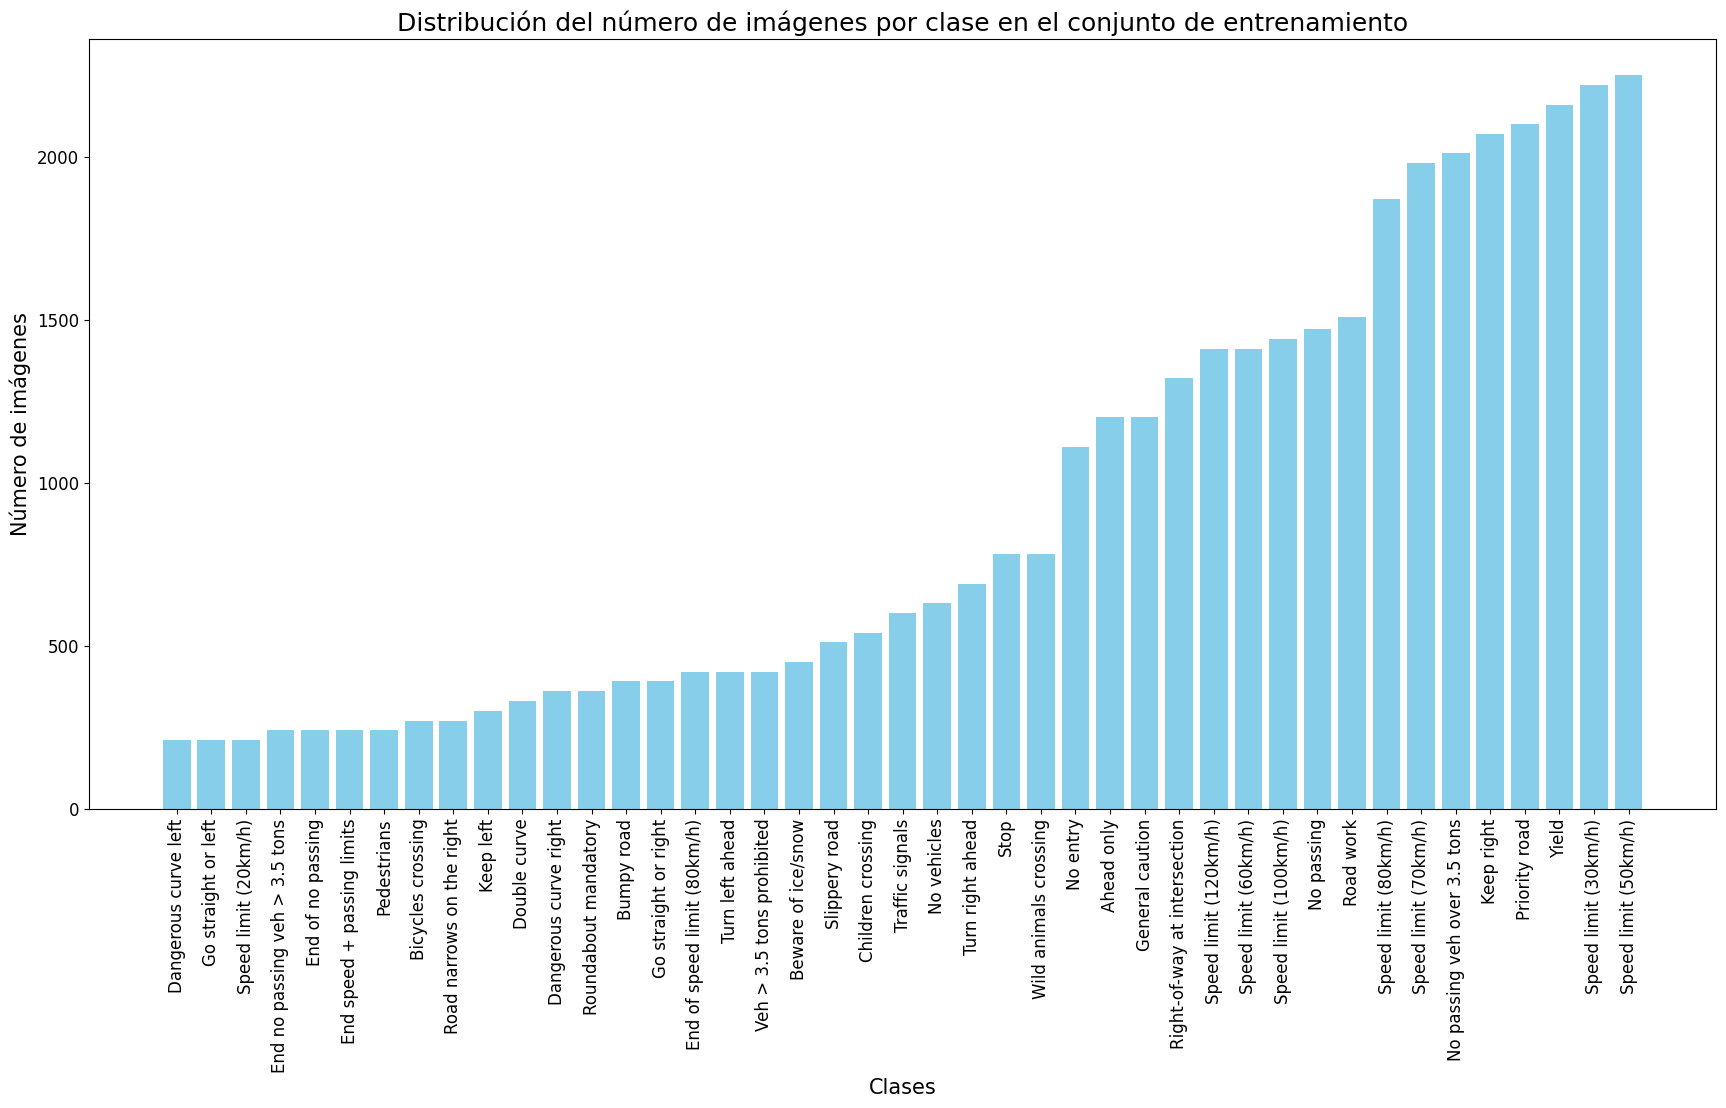

In [10]:
# Inicializar listas para el número de imágenes y las clases
train_number = []
class_num = []

# Iterar sobre las carpetas de clases
folders = os.listdir(train_dir)
for folder in folders:
    folder_path = os.path.join(train_dir, folder)
    train_files = os.listdir(folder_path)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])  # Mapear el número de clase al nombre

# Ordenar los datos según el número de imágenes en cada clase
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [list(tuple) for tuple in tuples]

# Graficar el número de imágenes en cada clase
plt.figure(figsize=(21, 10))
plt.bar(class_num, train_number, color="skyblue")
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Clases", fontsize=15)
plt.ylabel("Número de imágenes", fontsize=15)
plt.title("Distribución del número de imágenes por clase en el conjunto de entrenamiento", fontsize=18)
plt.show()

# Resumen imágenes de entrenamiento

In [11]:
def summarize_train_images():
    # Obtenemos las rutas de las imágenes
    train_image_paths = []
    total_train_images = 0  # Variable para contar el total de imágenes de entrenamiento

    for i in range(NUM_CATEGORIES):
        path = os.path.join(train_dir, str(i))
        if os.path.isdir(path):
            train_images = os.listdir(path)
            total_train_images += len(train_images)  # Incrementar el contador de imágenes
            train_image_paths.extend([os.path.join(path, img) for img in train_images])
        else:
            print(f"El directorio {path} no existe.")

    # Mostrar la cantidad total de imágenes de entrenamiento
    print(f"Total de imágenes de entrenamiento: {total_train_images}")

    # Mostrar algunas imágenes de entrenamiento
    plt.figure(figsize=(25, 25))
    for i in range(1, 26):
        plt.subplot(5, 5, i)
        random_train_img_path = random.choice(train_image_paths)
        train_img = imread(random_train_img_path)
        plt.imshow(train_img)
        plt.grid(False)  # Remover la cuadrícula
        plt.xlabel(f'Width: {train_img.shape[1]}', fontsize=20)  # Ancho de la imagen
        plt.ylabel(f'Height: {train_img.shape[0]}', fontsize=20)  # Alto de la imagen

    plt.show()


Total de imágenes de entrenamiento: 39228


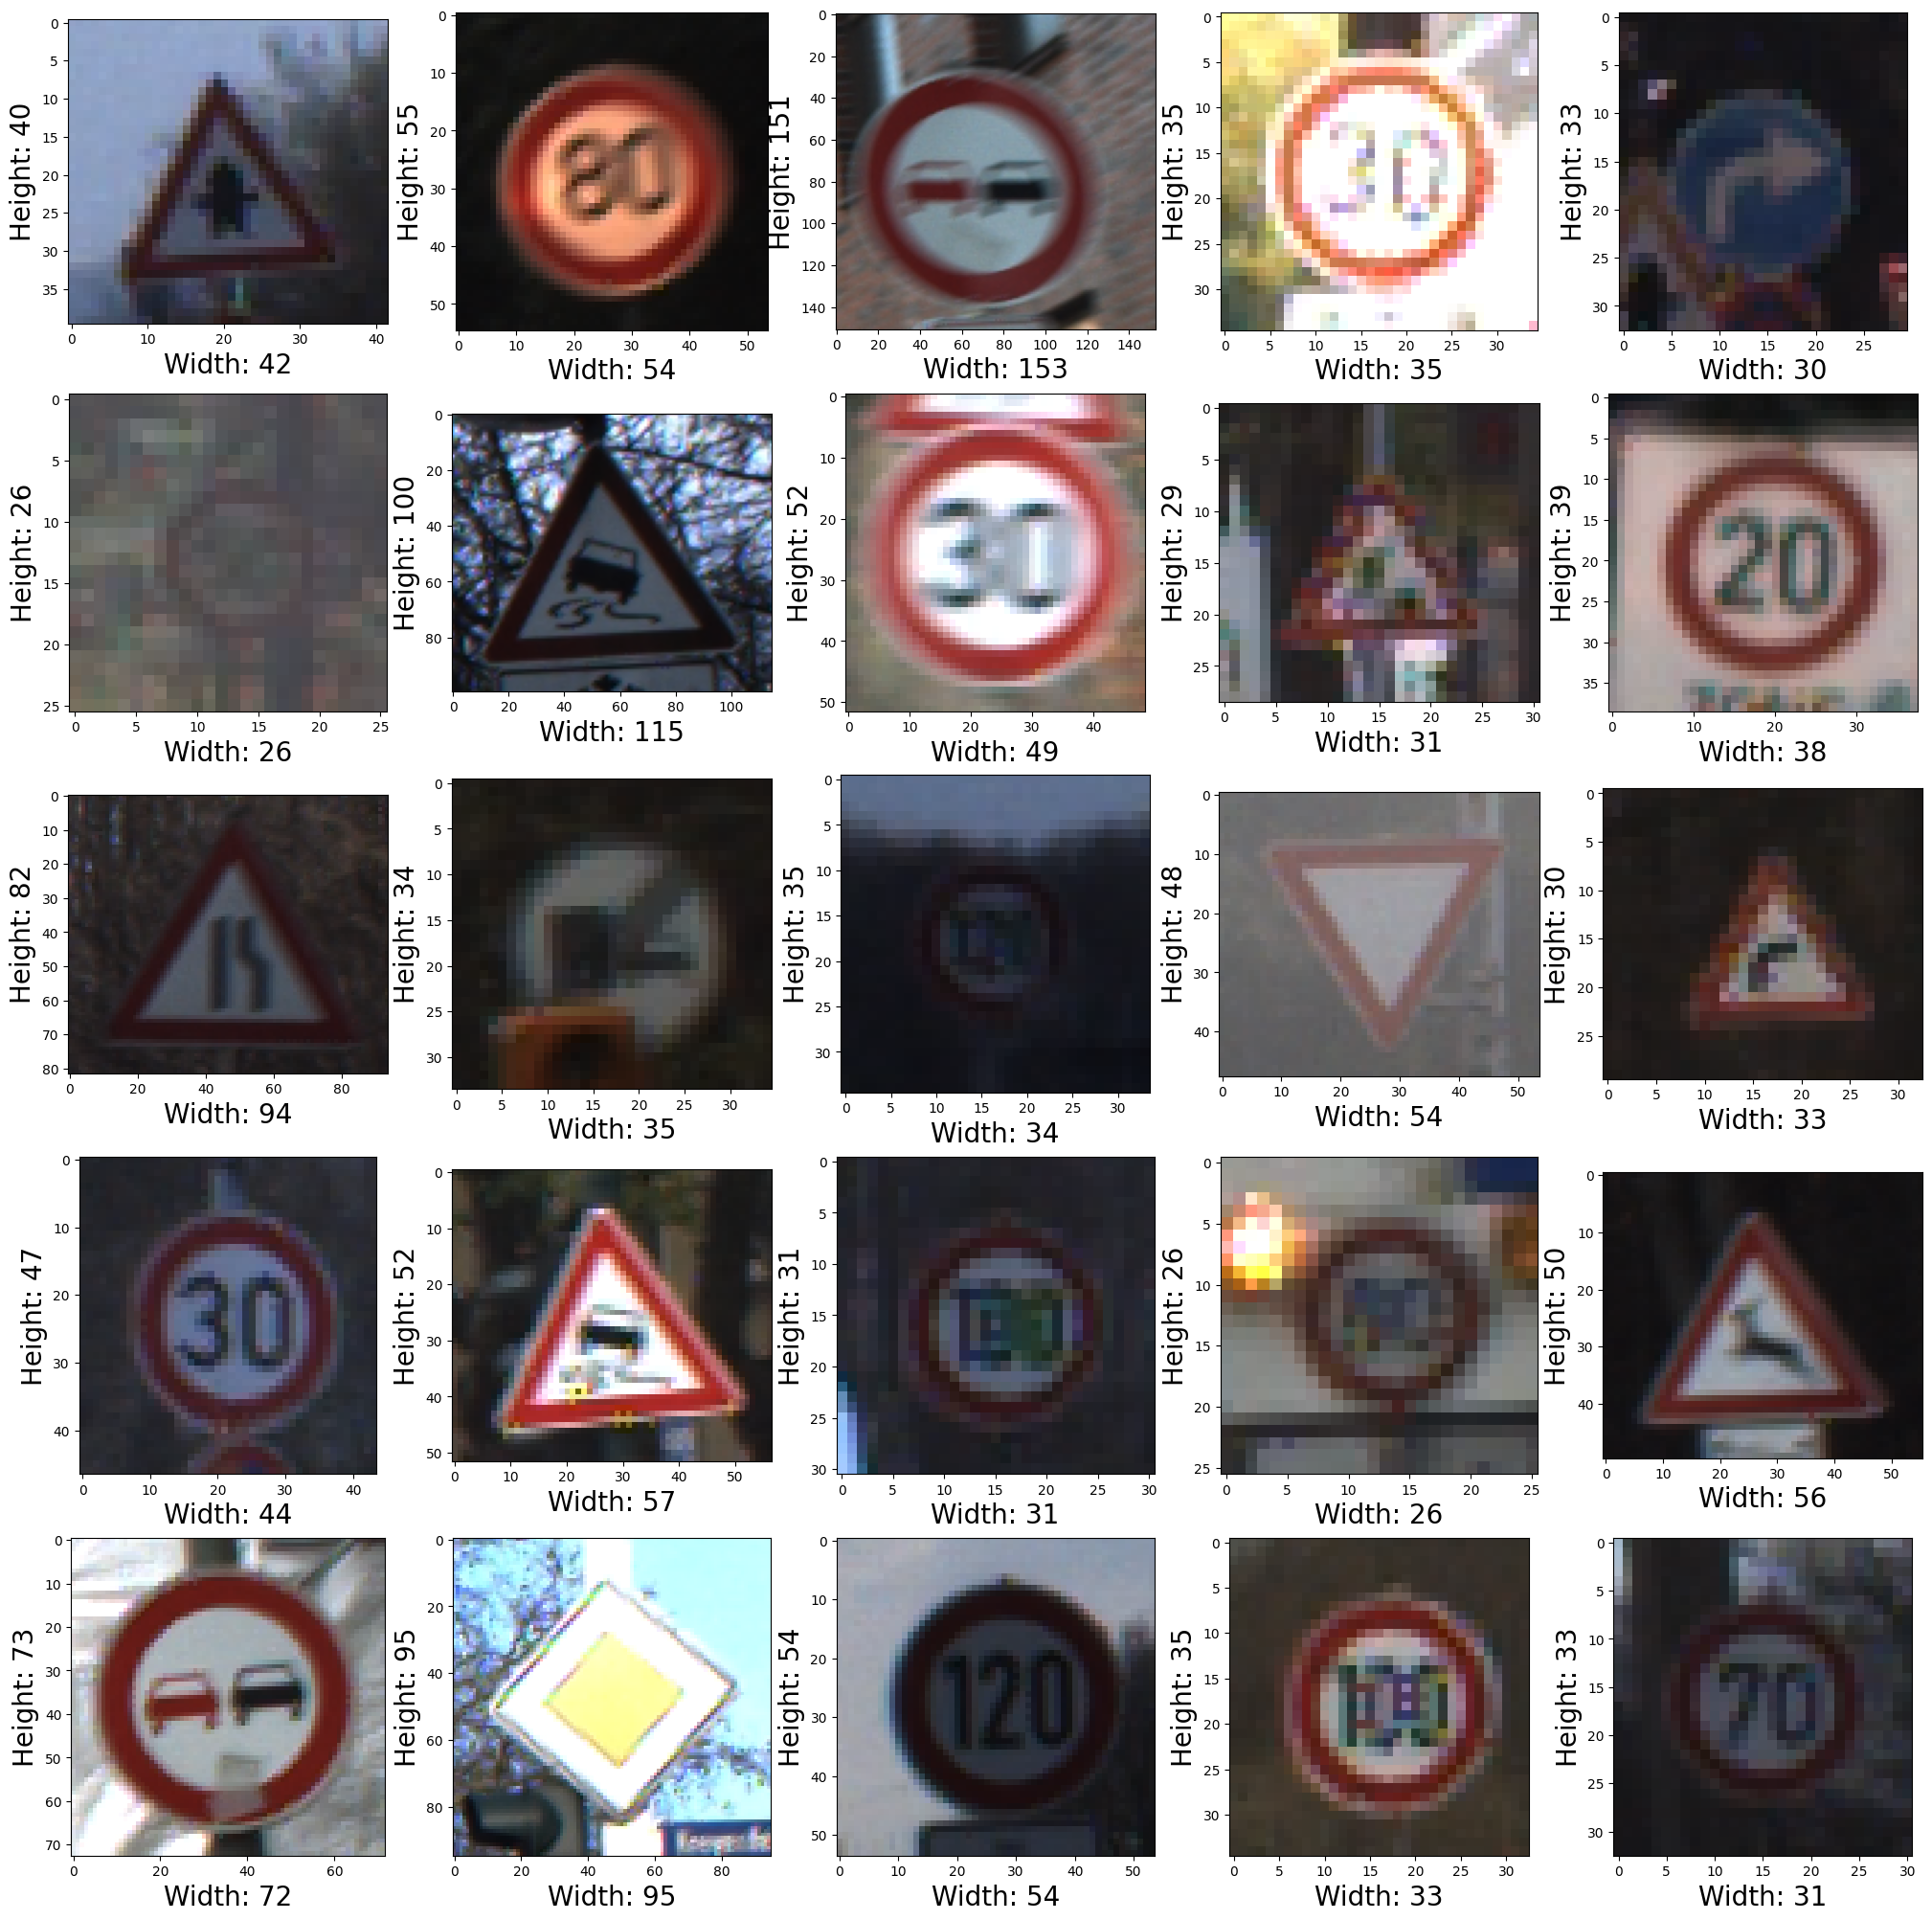

In [12]:
summarize_train_images()

# Resumen imágenes de prueba

In [13]:
def summarize_test_images():
    print("\nResumen del dataset de prueba:")

    test_images = os.listdir(test_dir)
    total_test_images = len(test_images)

    print(f"Total de imágenes en el dataset de prueba: {total_test_images}")

    # Mostrar algunas imágenes de prueba
    plt.figure(figsize=(25, 25))
    for i in range(1, 26):
        plt.subplot(5, 5, i)
        random_test_img_path = os.path.join(test_dir, random.choice(test_images))
        test_img = imread(random_test_img_path)
        plt.imshow(test_img)
        plt.grid(False)  # Remover la cuadrícula
        plt.xlabel(f"Width: {test_img.shape[1]}", fontsize=20)  # Ancho de la imagen
        plt.ylabel(f"Height: {test_img.shape[0]}", fontsize=20)  # Alto de la imagen
    plt.show()



Resumen del dataset de prueba:
Total de imágenes en el dataset de prueba: 12642


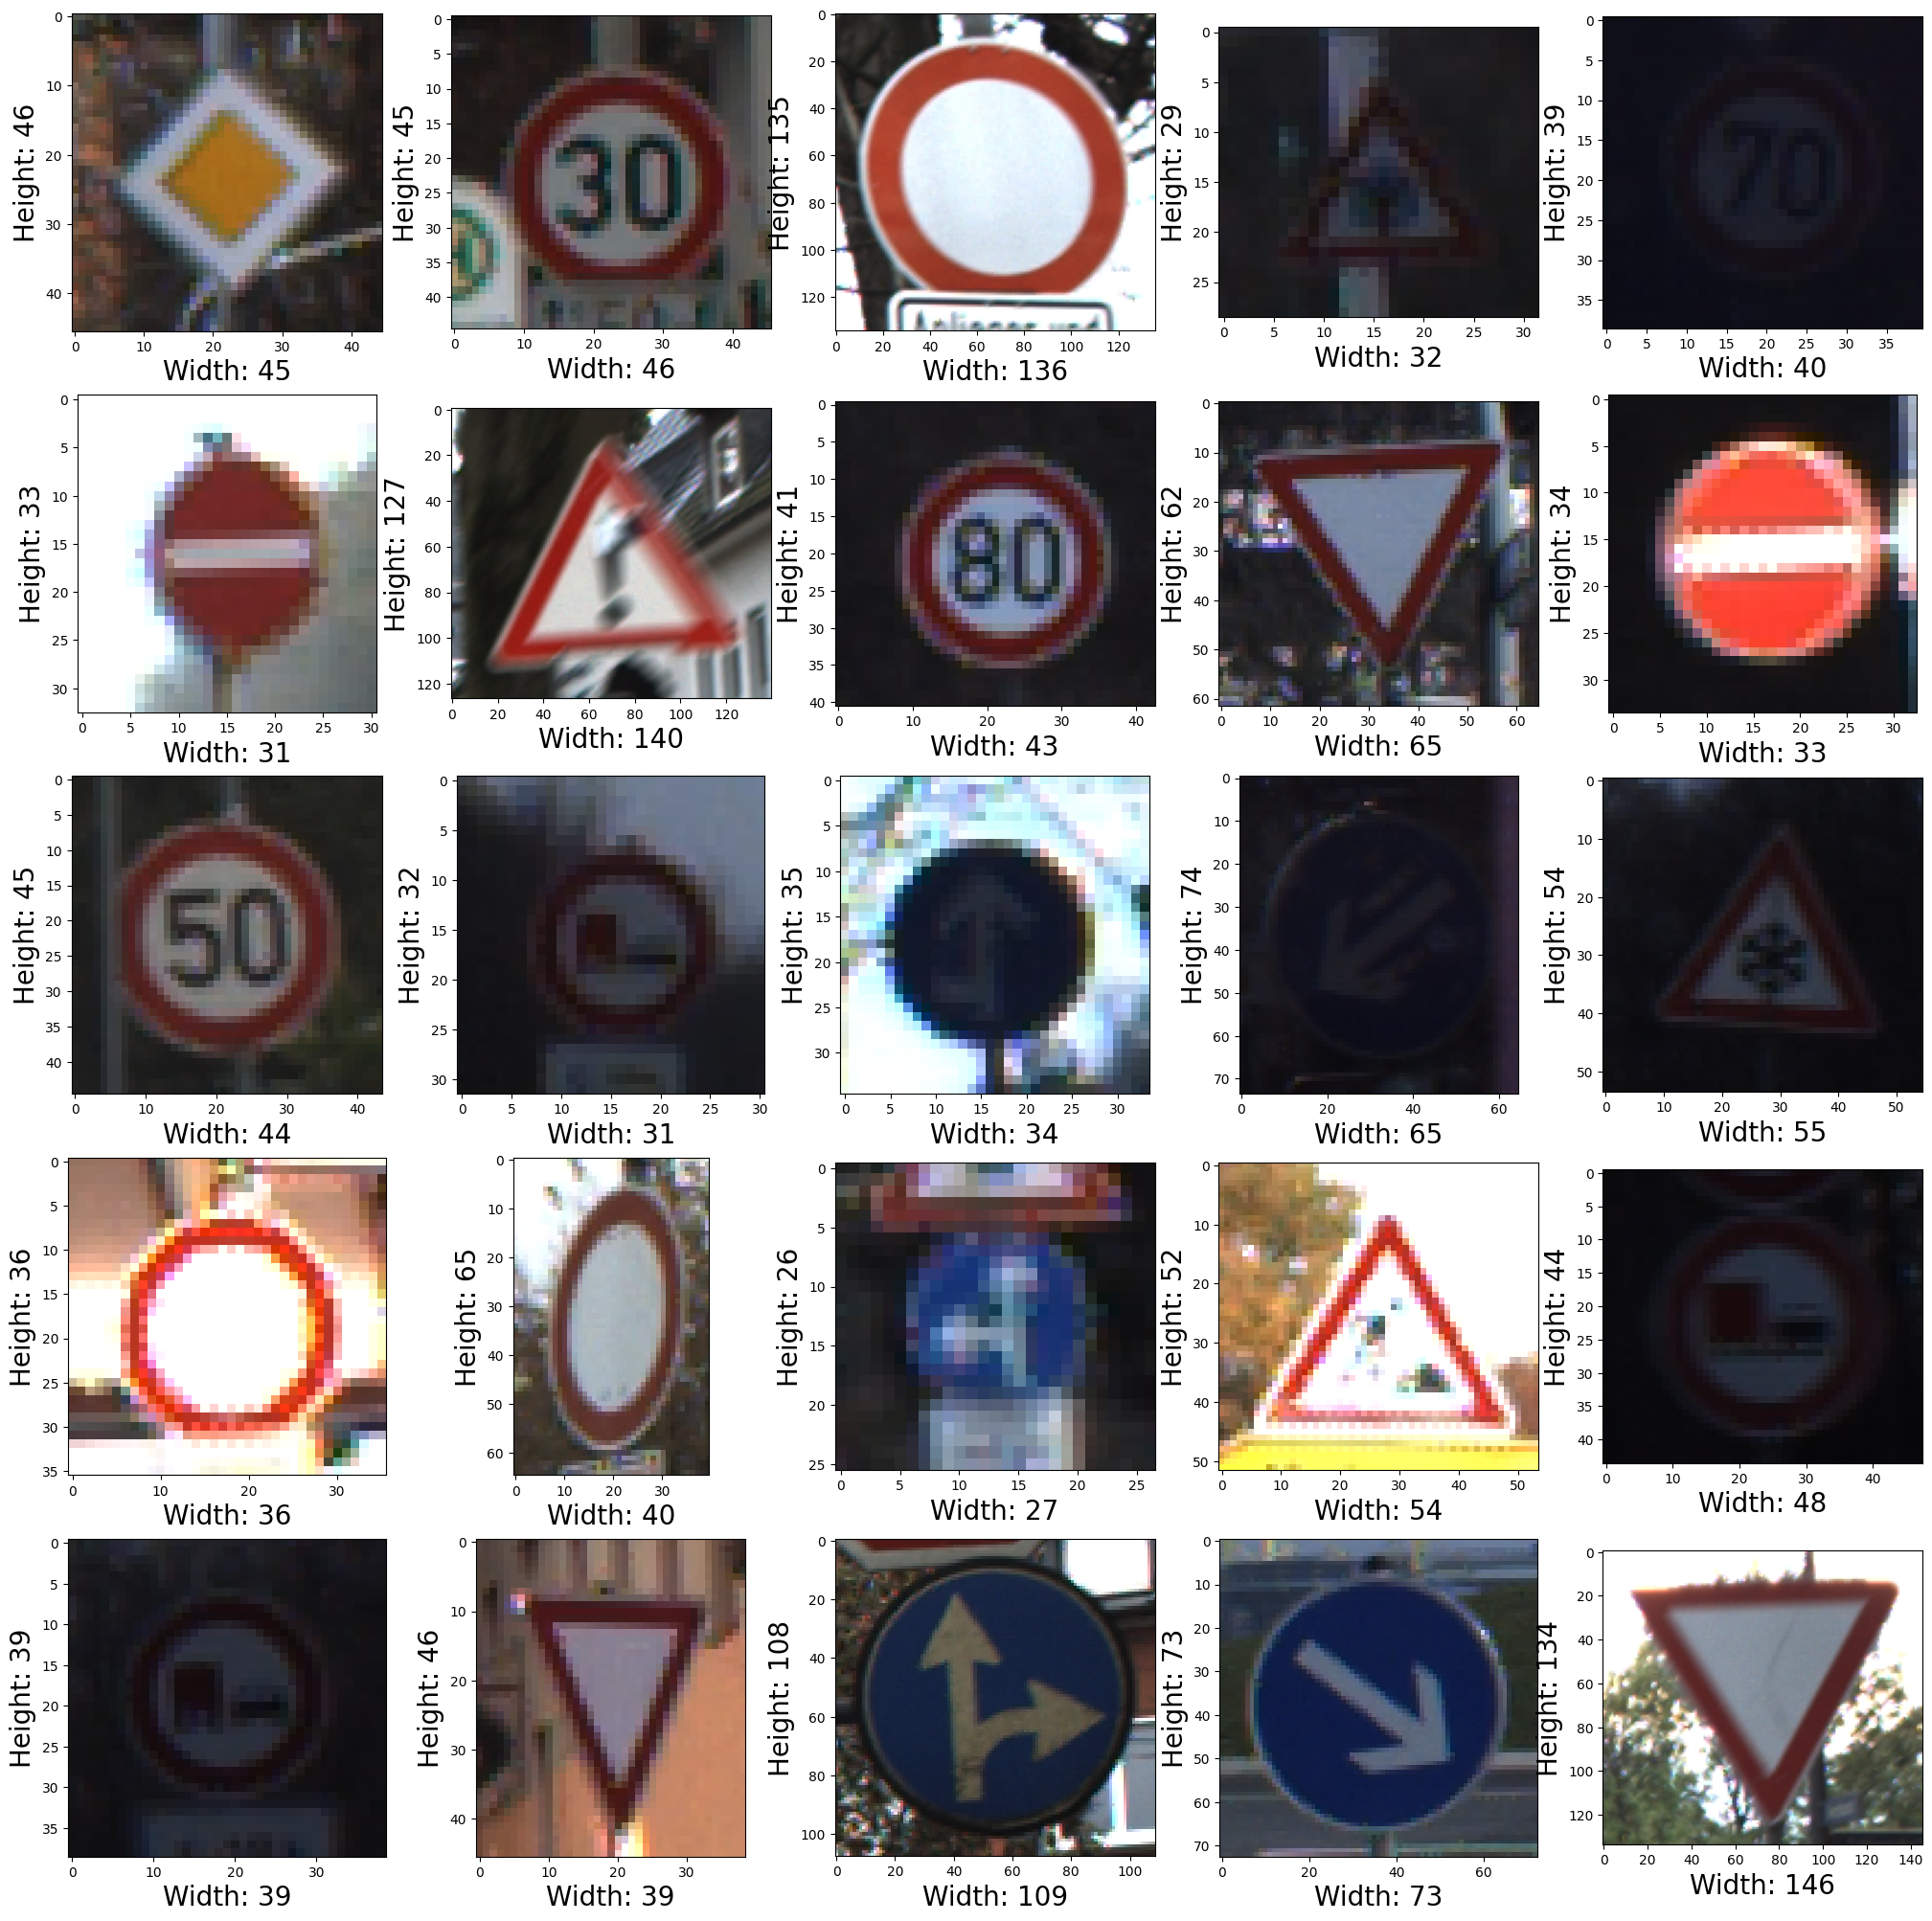

In [14]:
summarize_test_images()

# Visualizar algunas imágenes por clase

In [15]:
def display_images_per_class():
    plt.figure(figsize=(25, 25))
    for i in range(NUM_CATEGORIES):
        path = os.path.join(train_dir, str(i))
        images = os.listdir(path)
        img_path = os.path.join(path, random.choice(images))  # Tomar una imagen aleatoria de cada clase
        img = imread(img_path)
        plt.subplot(7, 7, i + 1)  # Ajustar según el número de clases
        plt.imshow(img)
        plt.title(f"Clase {i}")
        plt.grid(False)
        plt.axis('off')

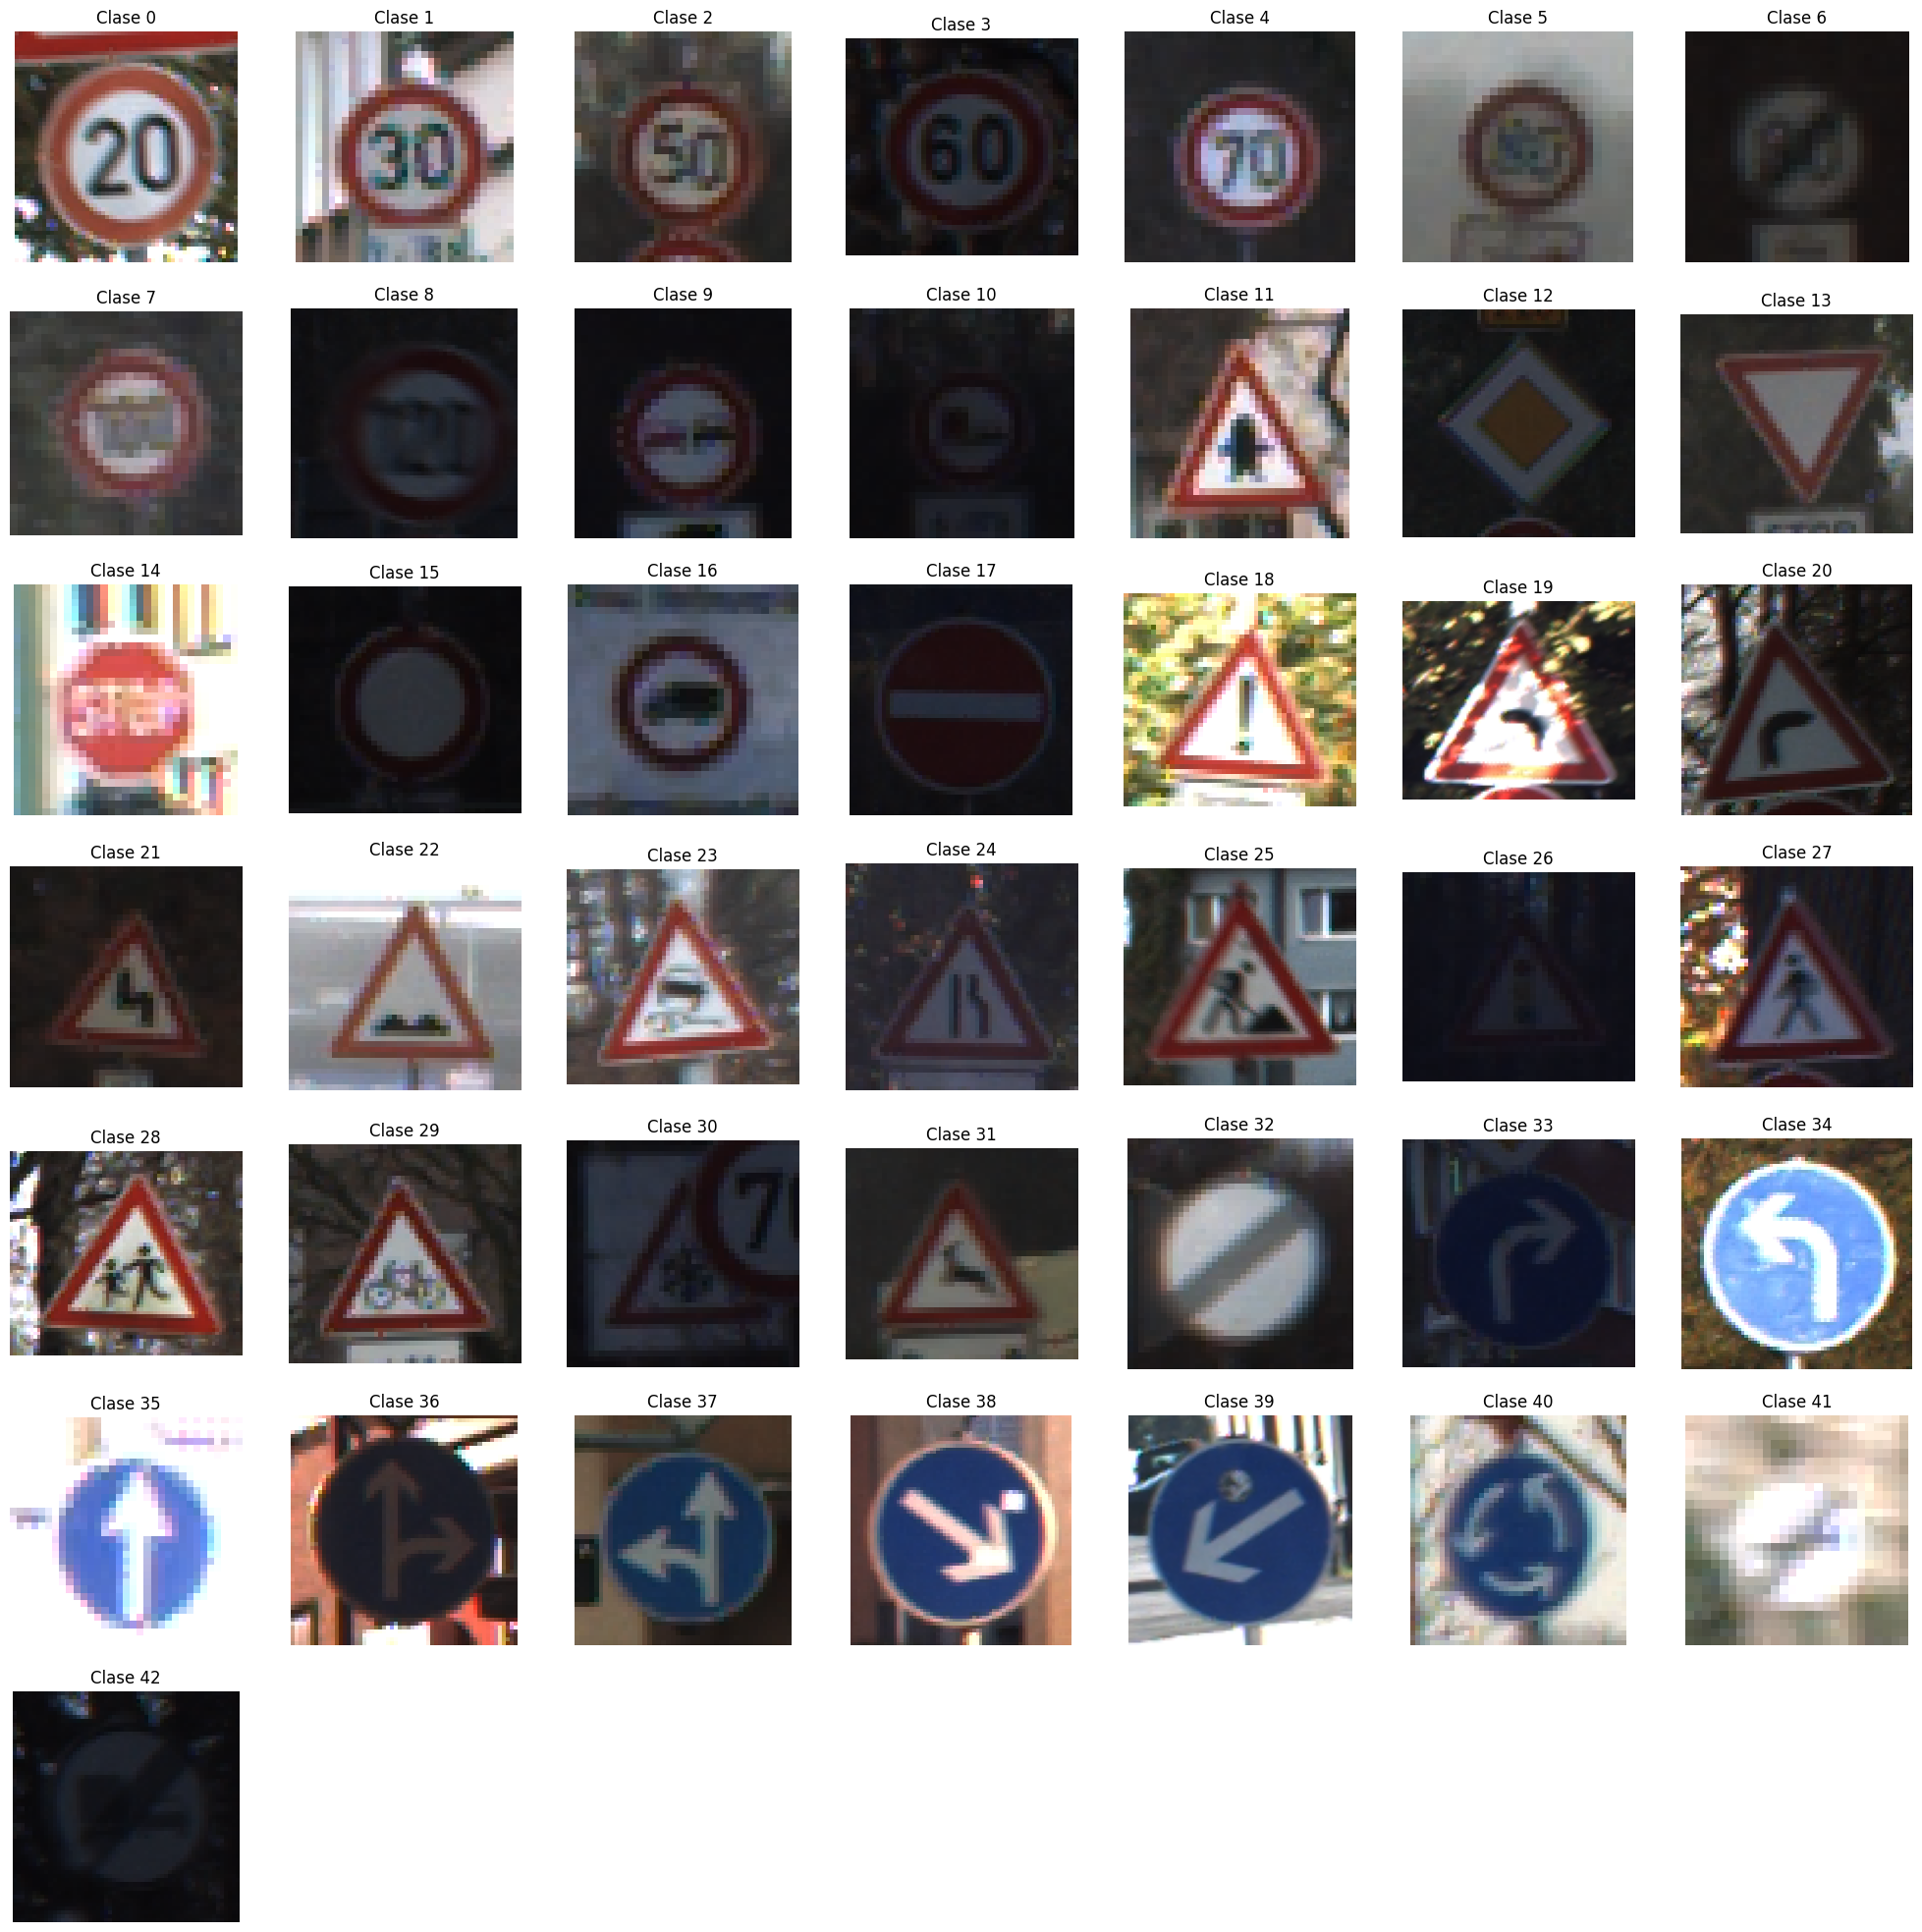

In [16]:
display_images_per_class()

# Detectar y contar imágenes negras

In [17]:
def detect_and_count_dark_images():
    dark_images = []
    threshold = 10

    for i in range(NUM_CATEGORIES):
        path = os.path.join(train_dir, str(i))
        images = os.listdir(path)
        for img in images:
            try:
                image_path = os.path.join(path, img)
                image = cv2.imread(image_path)
                if image is not None:
                    # Convertir la imagen a escala de grises
                    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    # Calcular el brillo promedio de la imagen
                    avg_brightness = np.mean(gray_image)
                    if avg_brightness < threshold:
                        dark_images.append(image_path)
                else:
                    print(f"Error al cargar la imagen {img}")
            except Exception as e:
                print(f"Error al procesar la imagen {img}: {e}")

    print(f"Total de imágenes negras encontradas: {len(dark_images)}")
    if dark_images:
        print("Imágenes negras encontradas:")
        for dark_img in dark_images:
            print(dark_img)


In [18]:
detect_and_count_dark_images()

Total de imágenes negras o casi negras encontradas: 135
Imágenes negras o casi negras encontradas:
/content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00024_00007.png
/content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00054_00017.png
/content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00054_00028.png
/content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00024_00008.png
/content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00024_00027.png
/content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00054_00026.png
/content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00024_00006.png
/content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00054_00001.png
/content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00054_00019.png
/content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00054_00027.png
/content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00024_00028.png
/content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00024_00009.png
/content/drive/MyDrive/GTSRB_Dataset/Train/4/00004_00054_00002.png
/content/drive/MyDrive/GTSRB_D

# Detectar y contar imágenes borrosas

In [19]:
def detect_and_count_blurry_images():
    blurry_images = []
    threshold = 100.0

    for i in range(NUM_CATEGORIES):
        path = os.path.join(train_dir, str(i))
        images = os.listdir(path)
        for img in images:
            try:
                image_path = os.path.join(path, img)
                image = cv2.imread(image_path)
                if image is not None:
                    # Convertir la imagen a escala de grises
                    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    # Calcular la varianza del Laplaciano
                    laplacian_var = cv2.Laplacian(gray_image, cv2.CV_64F).var()
                    if laplacian_var < threshold:
                        blurry_images.append(image_path)
                else:
                    print(f"Error al cargar la imagen {img}")
            except Exception as e:
                print(f"Error al procesar la imagen {img}: {e}")

    print(f"Total de imágenes borrosas encontradas: {len(blurry_images)}")
    if blurry_images:
        print("Imágenes borrosas encontradas:")
        for blurry_img in blurry_images:
            print(blurry_img)


In [20]:
detect_and_count_blurry_images()

Total de imágenes borrosas encontradas: 3829
Imágenes borrosas encontradas:
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00046_00029.png
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00046_00010.png
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00046_00000.png
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00046_00028.png
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00046_00024.png
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00046_00001.png
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00046_00023.png
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00046_00005.png
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00046_00025.png
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00046_00016.png
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00046_00017.png
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00052_00028.png
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00052_00025.png
/content/drive/MyDrive/GTSRB_Dataset/Train/1/00001_00

# Imágenes corruptas

In [21]:
def check_for_corrupt_images():
    corrupt_images = []
    for i in range(NUM_CATEGORIES):
        path = os.path.join(train_dir, str(i))
        images = os.listdir(path)
        for img in images:
            try:
                image_path = os.path.join(path, img)
                image = cv2.imread(image_path)
                if image is None:
                    corrupt_images.append(image_path)
            except Exception as e:
                corrupt_images.append(image_path)
    if corrupt_images:
        print("Imágenes corruptas encontradas:")
        for corrupt_img in corrupt_images:
            print(corrupt_img)
    else:
        print("No se encontraron imágenes corruptas.")

In [ ]:
check_for_corrupt_images()